# word2vec model and sample queries

See Miklov et. al. 2013 for a description of the method 

01/08/2020: Initial version

In [3]:
# load required packages
import gensim
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# load Google News word2vec model
google_model = gensim.models.Word2Vec.load_word2vec_format('../models/google-vectors.w2v',
                                                           binary=True)

In [5]:
# make vocab available
vocab = google_model.vocab

In [6]:
print("vocab:",len(vocab))

vocab: 71291


In [7]:
# simple queries first, single word
google_model.most_similar(["ugly"],topn=20)

[('duckling', 0.5327365398406982),
 ('dumb', 0.5281784534454346),
 ('bad', 0.4887998402118683),
 ('buon', 0.46698492765426636),
 ('natured', 0.4560597538948059),
 ('nanny', 0.445090115070343),
 ('humored', 0.4384896159172058),
 ('stupid', 0.43475082516670227),
 ('nightmare', 0.42399391531944275),
 ('blonde', 0.41765478253364563),
 ('guys', 0.41635337471961975),
 ('pretty', 0.4152640104293823),
 ('crazy', 0.41439175605773926),
 ('skinny', 0.40997976064682007),
 ('loner', 0.40642091631889343),
 ('cheerful', 0.4063911437988281),
 ('kiki', 0.40433377027511597),
 ('foolish', 0.40162941813468933),
 ('lazy', 0.4013705253601074),
 ('lovable', 0.40061265230178833)]

In [60]:
# now we can add other terms to produce "better" queries
query = ["term1","term2","term3"]
google_model.most_similar(query,topn=20)

[('individuals', 0.6033874154090881),
 ('oneself', 0.5217636823654175),
 ('virtue', 0.5150766968727112),
 ('or', 0.5132195353507996),
 ('obligation', 0.5017349720001221),
 ('entity', 0.4980880618095398),
 ('persons', 0.4924635887145996),
 ('any', 0.4768257737159729),
 ('desires', 0.4745156466960907),
 ('itself', 0.46881645917892456),
 ('merely', 0.46803826093673706),
 ('conscious', 0.46411627531051636),
 ('obedience', 0.4601413309574127),
 ('internalized', 0.4577147960662842),
 ('voluntary', 0.4528539776802063),
 ('necessarily', 0.4506300389766693),
 ('therefore', 0.45045652985572815),
 ('thus', 0.44733870029449463),
 ('submissive', 0.44692468643188477),
 ('believer', 0.4451025426387787)]

In [8]:
# extract data to plot from a query (uses above, from "query" variable)
# this is examining neighbors in semantic space 

response = google_model.most_similar("ugly",topn=20)

neighbor_list=list()
words=list()
for i in response:
    words.append(i[0])
    neighbor_list.append(google_model.wv[i[0]])

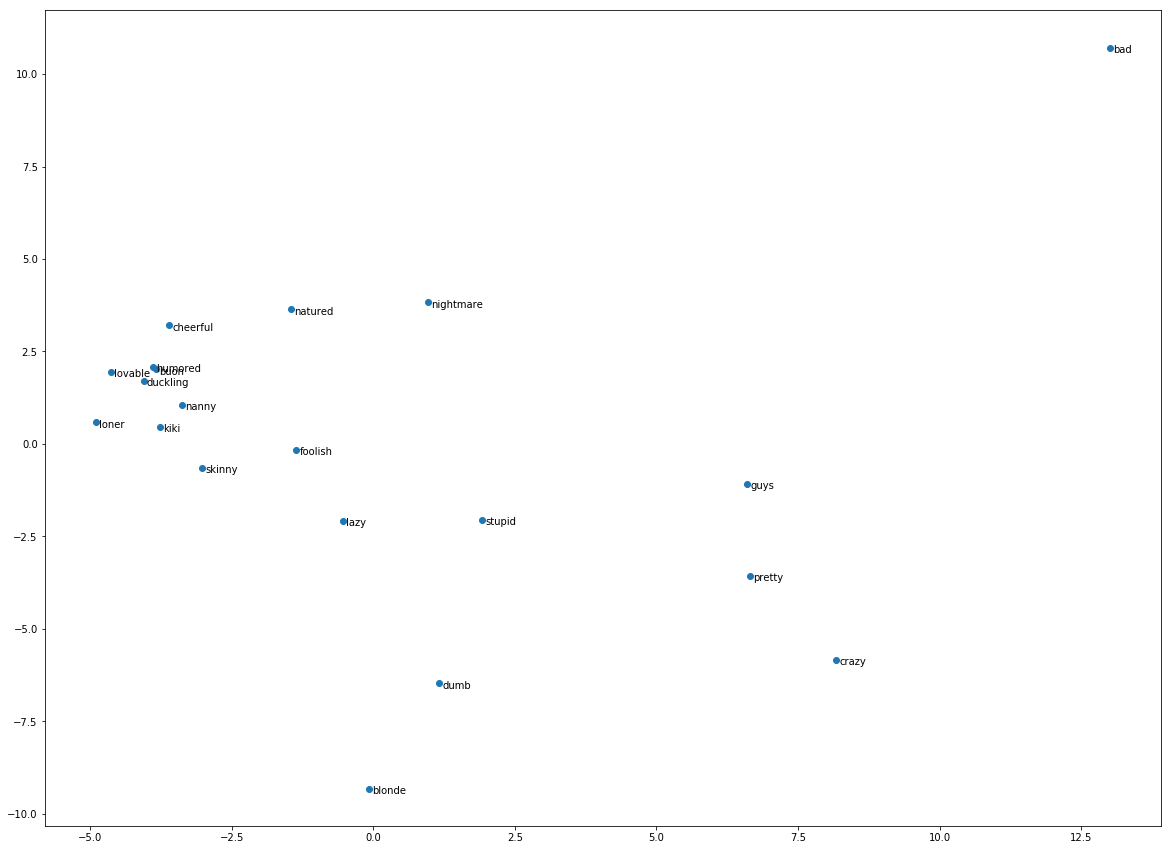

In [9]:
pca = PCA(n_components=2)
plot_data = pca.fit_transform(neighbor_list)

xs = plot_data[:, 0]
ys = plot_data[:, 1]
fig = plt.figure(figsize=(20, 15))
plt.clf()
plt.scatter(xs, ys, marker = 'o')
  
for i, w in enumerate(words):
    plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
    textcoords = 'offset points', ha = 'left', va = 'top')

In [10]:
# this is the analogical reasoning task from the paper
google_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6040533185005188),
 ('daughter', 0.51621413230896),
 ('anjou', 0.5000643134117126),
 ('heiress', 0.49906477332115173),
 ('matilda', 0.495861679315567),
 ('montferrat', 0.4946897029876709),
 ('melisende', 0.4926695227622986),
 ('marries', 0.4898712635040283),
 ('isabella', 0.4857516884803772),
 ('consort', 0.48264074325561523)]

In [11]:
google_model.most_similar("queen")

[('elizabeth', 0.6261435747146606),
 ('king', 0.561848521232605),
 ('consort', 0.5377508997917175),
 ('heiress', 0.5258089303970337),
 ('highness', 0.5255316495895386),
 ('margrethe', 0.5125117897987366),
 ('boleyn', 0.5117989778518677),
 ('princess', 0.5106729865074158),
 ('philippa', 0.5057759881019592),
 ('countess', 0.5044605731964111)]

In [8]:
# access vectors directly
google_model["ugly"]

array([ 2.93591952e+00,  1.67241180e+00,  7.28547156e-01,  3.82572174e-01,
        1.25510502e+00,  9.20689926e-02, -2.03392789e-01,  1.14944124e+00,
        7.84049749e-01,  2.13742137e+00, -6.22926235e-01,  1.92957413e+00,
       -1.53770828e+00, -2.07218456e+00,  2.94179583e+00, -2.54308581e-01,
        2.97383934e-01,  1.21070898e+00, -7.12806344e-01,  5.74996471e-01,
        9.90859151e-01,  1.15819967e+00, -4.33582425e-01, -4.62130100e-01,
        4.51177284e-02, -5.22986710e-01, -1.01336741e+00, -3.59742552e-01,
        2.06923223e+00, -1.41766500e+00, -7.67920673e-01,  1.33755875e+00,
        8.60366970e-02,  8.17725062e-01,  6.83714151e-01,  8.36376488e-01,
        9.27684009e-02, -3.26953411e-01,  2.79235387e+00,  8.51736031e-03,
       -4.09439653e-01,  2.40391091e-01, -4.92889360e-02, -8.21148753e-01,
        7.92768657e-01, -2.23665223e-01, -1.07076317e-01,  3.33887011e-01,
       -6.19639754e-01, -4.61912036e-01, -1.35303271e+00, -2.37777367e-01,
       -7.56737888e-01,  